from https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb

## Required libraries
* Numpy
* pandas
* scikit-learn
* matplotlib
* seaborn


## Problem Domain
* Iris
* septal length/width, petal length / width
* [data set](https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/131fba0f4356bdd512c436a347ccea61375a0cdf/example-data-science-notebook/iris-data.csv)

In [1]:
#!wget https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/131fba0f4356bdd512c436a347ccea61375a0cdf/example-data-science-notebook/iris-data.csv

## Step 1 : Answering the questions
* 해답을 찾는 질문이나 문제를 정의하는 것
* 그 과제를 풀어내는데 있어서 성공하기 위한 측정법을 정의하는 것
> 데이터를 만지기 전에 데이터 분석 문제(탐사, 조합, 인과관계)의 종류를 상세화했습니까?
> Did you speicify the type of data analytic question (eg exploration, association causailty) before touching the data?
* 우리는 우리가 제공할 sepal length/width, petal length/width 네가지의 값을 기초로 꽃의 종(class)을 분류하려고 한다. 
> 시작전에 성공을 위한 계량법을 정의했나요?
> Did you define the metric for success before beginning?
* 우리는 [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision)를 이용할것이다.
* 우리의 모델이 얼마나 잘 수행되는지를 수치화 하는 것이다.
* 적어도 90%의 정확도를 달성해야만 한다. : 정의내용
> 그 질문과 그 과학적인 또는 사업적인 응용을 위한 맥락을 이해했나요? Did you understand the context for the question and the scientific or business application?
* 데이터 분석 파이프라인을 '찍은 사진으로부터' 종을 분류하는 스마트폰앱을 위해서 만들 것이다.
* 미래에는 이 파이프라인이 다양한 다른 파이프라인과 접속이 가능할 것이다.
> 실험적인 설계를 기록한 적이 있나요? Did you record the experimental design?
 
> Did you consider whether the question could be answered with the available data?


## Step2 : Checking the data
* 아래 질문에 대한 답을 찾을 것이다.
 * 데이터에 잘못된 데이터가 있나?
 * 데이터에 quirks(변덕스런)데이터가 있나?
 * 데이터의 어떠한 부분을 수정/삭제할 필요가 있는가?

In [2]:
import pandas as pd

In [3]:
iris_data = pd.read_csv('iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data = pd.read_csv('iris-data.csv', na_values=['NA'])

In [5]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

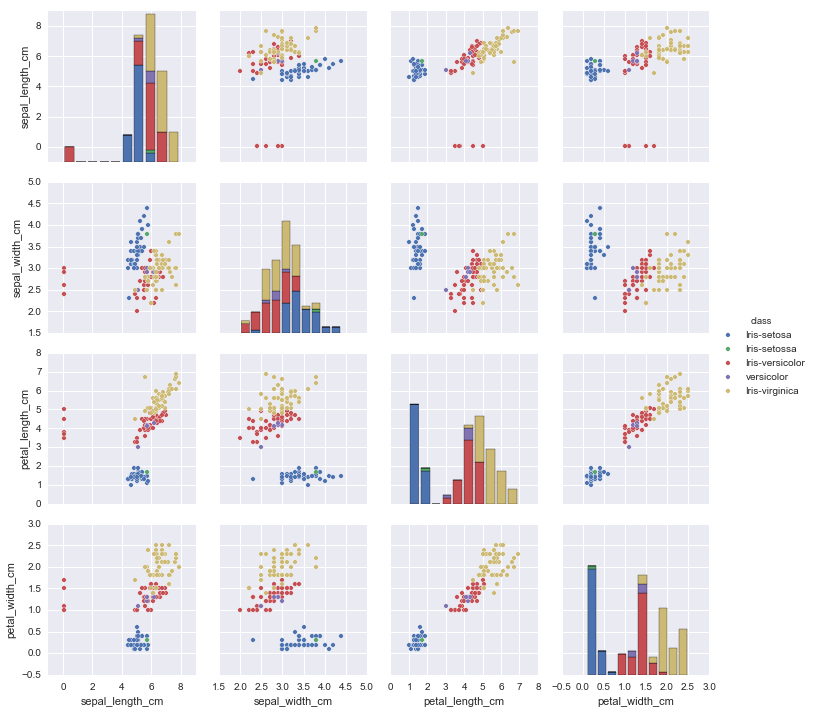

In [7]:
sb.pairplot(iris_data.dropna(), hue='class')

## Step 3: Tidying the data (데이터 정리하기)
> 5개 클래스는 3개가 되어야 한다. 

In [8]:
iris_data.loc[iris_data['class']=='versicolor','class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class']=='Iris-setossa','class'] = 'Iris-setosa'
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

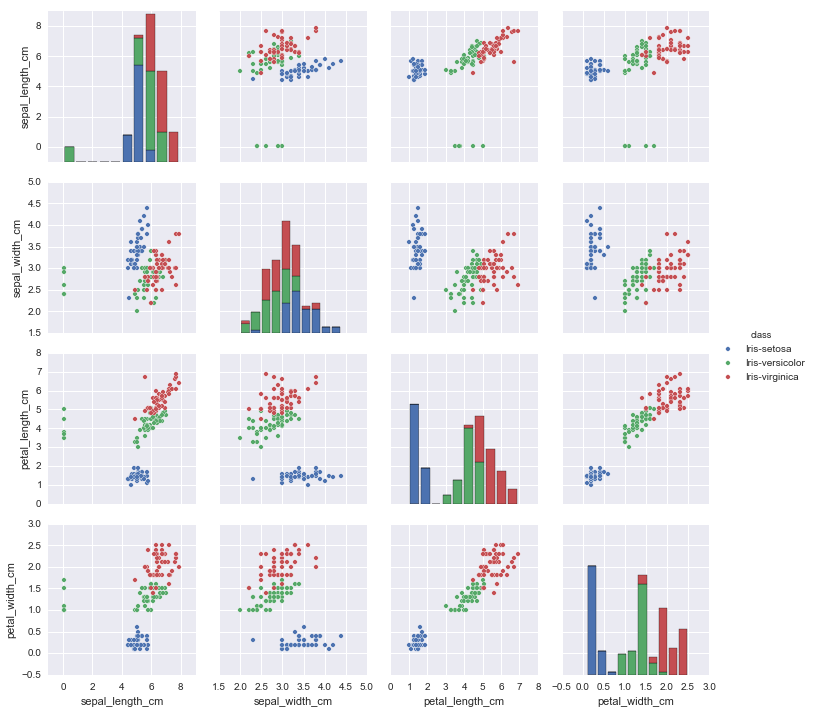

In [9]:
sb.pairplot(iris_data.dropna(), hue='class')

* outliers may be erroneous : 아웃라이어가 잘못된 것일 수도 있다.
* `Iris-setosa` 의 `sepal_width_cm` 는 정상 범위를 벗어나 있었음
* `Iris-versicolor`의 여러 `sepal_length_cm` 는 어떤 이유에서인지 영에 가까웠다.

* **Fixing outlier can be tricky business**
* 아웃라이어가 측정에러의 원인이거나, 부적절한 단위들에서 데이터가 저장되었거나, 또는 아웃라이어가 정말 비정상일 경우 같이 확실하지 않다.
* 아웃라이어들을 다룰때에는 사려깊게(분별력있게) 다루어야 한다.
* 만약, 우리가 어떠한 데이터를 제외하기로 결정했다면, 우리가 제외할 문서에 대해서 확실히 할 필요가 있고, 제외하는 데이터들에 대한 확고한 이유를 제공해야 한다. ==> "이 데이터는 내 가설에 맞지 않아"는 리뷰 단계에서는 적절치 않게 된다.
* `Iris-setosa` 의 `sepal-width`가 2.5cm이하는 제외한다.

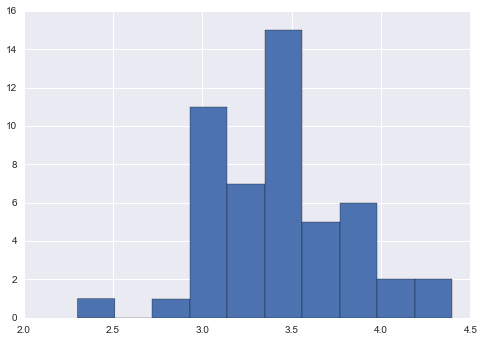

In [10]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

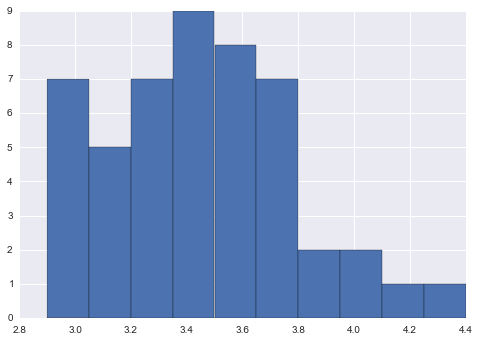

In [11]:
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >=2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

* Iris-versicolor의 0에 가까운 sepal-length에 대해서 처리 할 것이다.

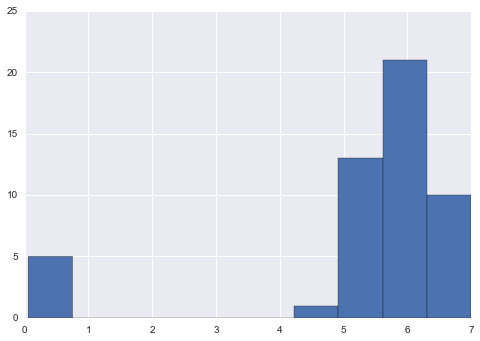

In [12]:
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [13]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm']<1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


* **sepal_length_cm**가 잘못 기재된것이라면(?) 그 값을 변경해주는게 좋은 것이다.
* 미터로 기재된것이라면, cm단위로 바꿔주는 것(x100)

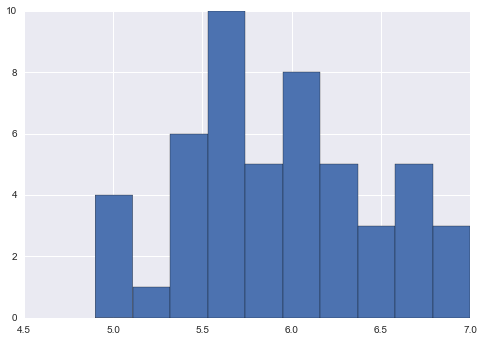

In [14]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

* Good ting we fixed those outliers,  
> We had to drop those rows with missing vslues.
* missing value들에 대해서 찾아보자.

In [15]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())             ]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


* 모든데이터가 **Iris-setosa**라서 버리기엔 이상적이지 않다. ==> 잠재적으로 바이어스 할수 있다.
* **mean imputation**(평균대치법)[link](http://curycu.blogspot.kr/2015/07/imputation.html)을 이용하기로 함
* 측정값들의 평균을 빈 값에 채워 넣는 방법이다.


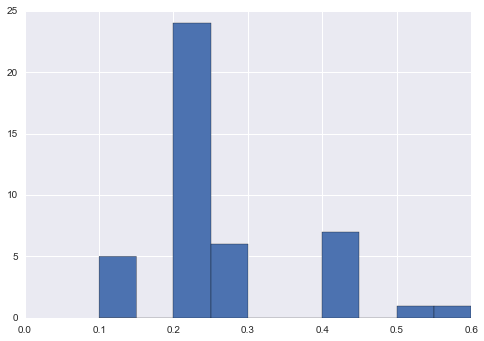

In [16]:
iris_data.loc[iris_data['class']=='Iris-setosa', 'petal_width_cm'].hist()

* 대부분의 width가 0.2~0.3에 위치해 있다., 그럼 평균값으로 채워보자.

In [17]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
iris_data.loc[(iris_data['class']== 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
             'petal_width_cm'] = average_petal_width
iris_data.loc[(iris_data['class']== 'Iris-setosa') &
              (iris_data['petal_width_cm']==average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [18]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


* There is no null data.
* 데이터를 채우는게 맘에 들지 않으면, `dropna()`를 이용해서 버리면된다.
   `iris_data.dropna(inplace=True)`

* 정제가 완료된 데이터를 저장하자.

In [19]:
iris_data.to_csv('iris-data-clean.csv', index=False)
iris_data_clean = pd.read_csv('iris-data-clean.csv')

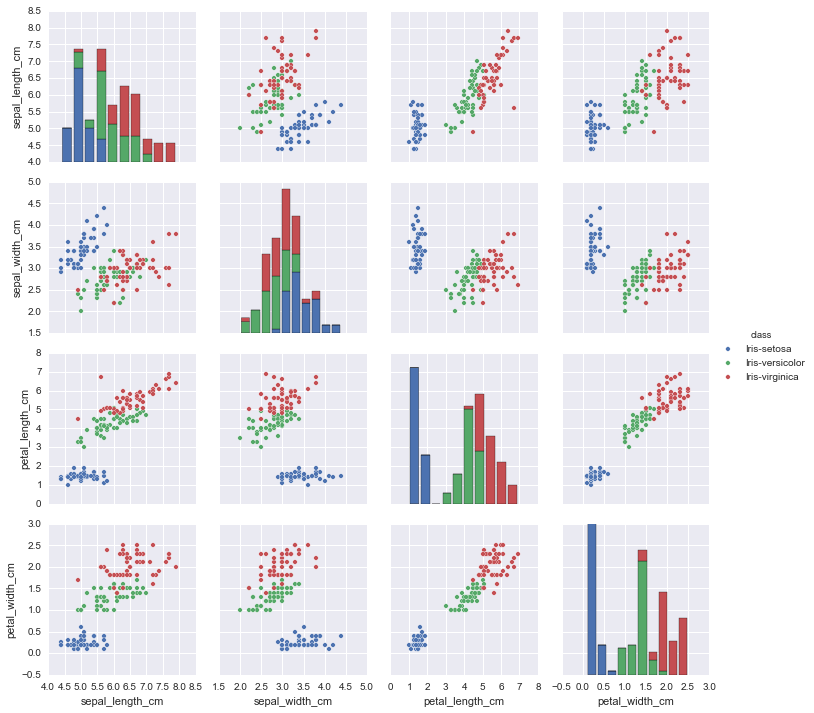

In [20]:
sb.pairplot(iris_data_clean, hue='class')

##  general takeaways(일반적인 중요한 부분) 
* 반드시 인코드된 당신의 데이터를 적절하게 만들어라.
* 반드시 당신의 데이터를 기대한 범위에 들어가도록 하고, 가능한 도메인 지식을 이용하도록 하라.
* 미싱 데이터를 다루는 방법은 이거 아니면 저것이다. 할수 있다면 대체하고, 그렇지 않다면 버려라.
* 절대로 수동적으로 당신의 데이터를 정제하지 마라, 왜냐하면 재현(reproducible)하기가 쉽지 않기 때문이다.
* 당신의 데이터를 정제하는 방법을 코드를 사용해서 기록하라.
* 분석 단계에서 데이터를 할수 있으면 모두 plotting하라. 그러면 모든것이 옳게 되는지를 시각적으로 확인할수 있다.

# Bonus : Test our data

In [21]:
assert 1 == 2

AssertionError: 

In [22]:
# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

In [23]:
# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

In [24]:
# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

# Step 4, exploratory analysis (탐색적 분석)

* **탐색적 분석**은 outlier,errors들을 제거한 데이터 위에서 들어가게 된다.
* 다음 질문들에 대해서 대답을 찾아야 한다.
 * 내 데이터의 분포는 어떻게 되는가?
 * 내 데이터에 어떠한 상관관계(correlations)가 있는가?
 * 이런 상관관계를 설명하는 혼재변수(confounding factors)가 있는가?
 
 > 상관관계(coreelation) : 두변수는 서로 독립적인 관계로부터 서로 상관된 관계일 수 있으며, 이 때 두 변수의 관계의 강도를 상관관계라고 한다.
 
 > 혼재변수(confounding factors) : 종속변수 외에 독립변수를 좌우하는 변수이지만, 실험설계시 고려되지 못한 변수 / 진짜 원인은 독립변수가 아닌 혼재변수 일수 있다. / 독립변수의 효과에 대해 대안적으로 해석가능
 > 수업방식(독립변수) -> 과학성취도(종속변수)
 > 수업방식(독립변수) -> 과학성취도(종속변수) <- 지능(혼재변수) : 지능의 차이에 따른 효과일 수도 있다.

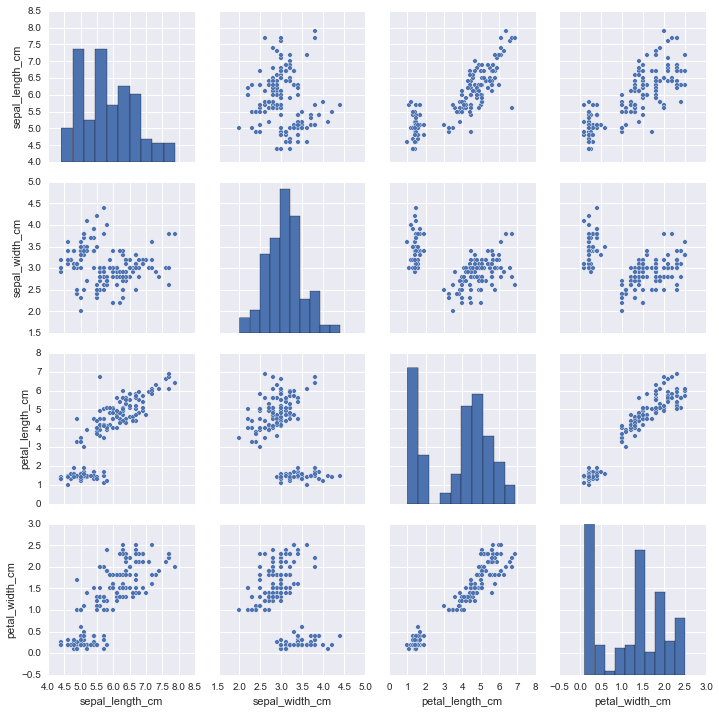

In [25]:
sb.pairplot(iris_data_clean)

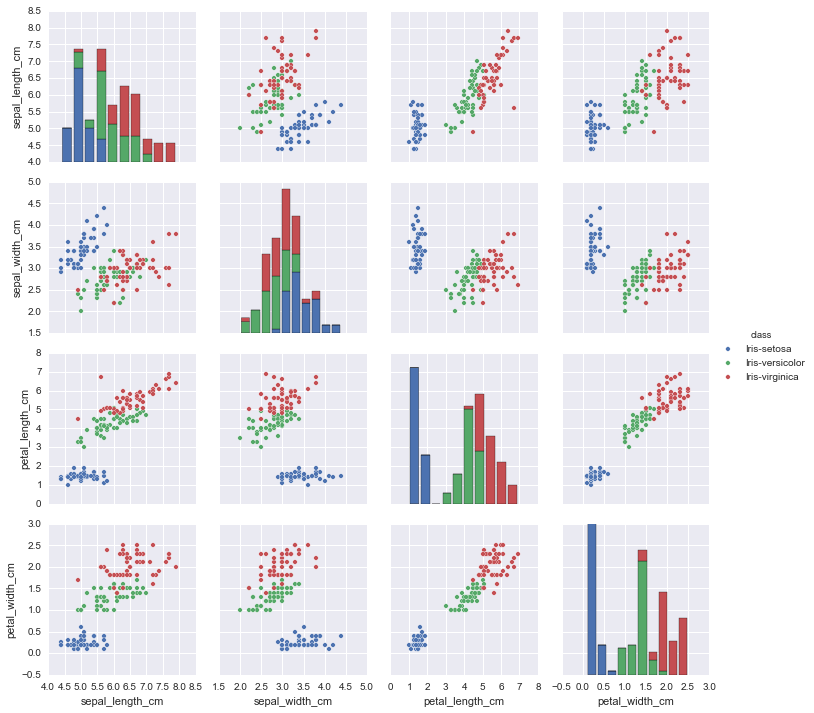

In [26]:
sb.pairplot(iris_data_clean, hue='class')

* Iris-setosa는 쉽게 분류가능하게 보인다. Iris-versicolor/Iris-virginica는 좀 더 어려워보인다.

viloin plot을 이용해서 데이터 분산를 클래별로 볼수가 있다. violin plot는 box-plots의 정보를 포함하고 있으며, 데이터의 밀도정보도 포함되어 있다.

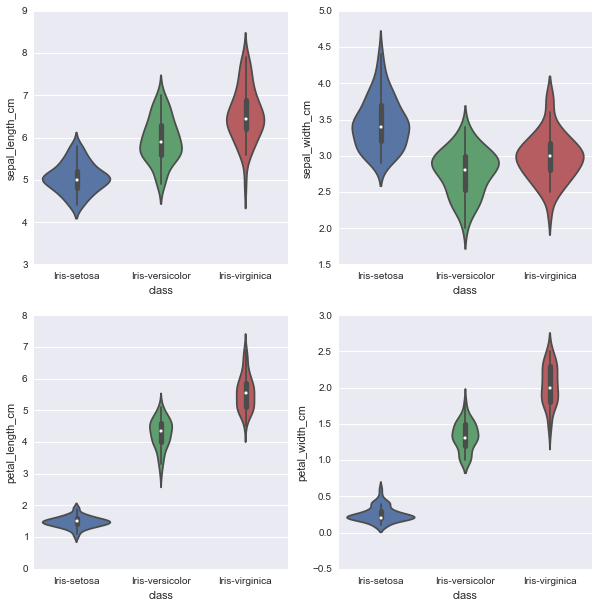

In [27]:
plt.figure(figsize=(10,10))
for column_index,column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2,2,column_index+1)
    sb.violinplot(x='class', y=column, data= iris_data_clean)

In [32]:
iris_data_clean.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.125633,0.848414,0.803132
sepal_width_cm,-0.125633,1.000000,-0.443664,-0.378865
petal_length_cm,0.848414,-0.443664,1.000000,0.960885
petal_width_cm,0.803132,-0.378865,0.960885,1.000000


# Step 5 : Classification

* 어떠한 데이터 분석에서도, 데이터 정제와 탐색은 굉장히 중요한 부분임을 명심해야 한다. -> 아직도 모델링을 하지 못했다.
* **Bad data leads to bad models.**

## Data splitting : traning / test sets

* training set : to train our models
* test set : to validate our models on unseen(unforseen)data

* 스파스한 데이터엣은 Overfit한 모델을 만들수 있다. => 학습셋으로 모델을 만들고, 테스트셋으로 평가하는게 중요한 이유임.


In [28]:
idc = pd.read_csv('iris-data-clean.csv')

all_inputs = idc[['sepal_length_cm', 'sepal_width_cm', 
                  'petal_length_cm', 'petal_width_cm']].values
all_classes = idc['class'].values

all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [34]:
# splitting
from sklearn.cross_validation import train_test_split

In [38]:
(training_inputs, testing_inputs, 
 training_classes, testing_classes)=  train_test_split(all_inputs, all_classes,
                                                       train_size=0.75, random_state=1)

In [39]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
# train
dt_classifier.fit(training_inputs, training_classes)
# validate
dt_classifier.score(testing_inputs, testing_classes)

0.97368421052631582

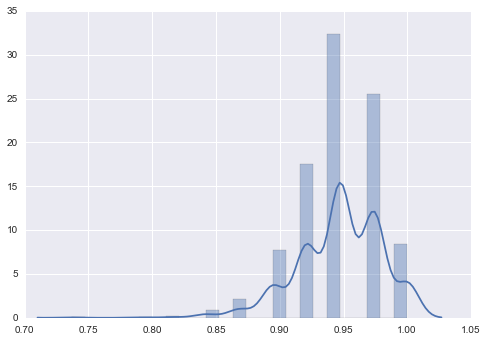

In [42]:
model_accuracies = []
for repetition in range(1000):
    (training_inputs, testing_inputs, 
     training_classes, testing_classes)=  train_test_split(all_inputs, all_classes,
                                                       train_size=0.75)
    dt_classifier = DecisionTreeClassifier()
    # train
    dt_classifier.fit(training_inputs, training_classes)
    # validate
    accuracy = dt_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(accuracy)
sb.distplot(model_accuracies)

* 학습데이터에 의존적으로 품질이 달라진다. 이런 현상을 **Overfitting**이라고 한다.


## Cross-validation

* 이 문제는 k-fold cross-validation을 수행하는 이유가 된다.
* k-subset으로 나누고, 각 서브셋의 testing set으로 이용하고 나머지를 학습데이터로 이용하여 테스팅한다.
* k번 반복한다.
* 일반적으로 10-fold cross-validation 을 수행한다.

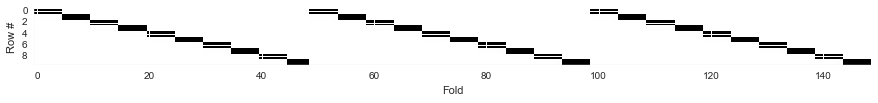

In [44]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold
def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    plt.figure(figsize=(15,15))
    plt.imshow(masks, interpolation='none')
    plt.xlabel('Fold')
    plt.ylabel('Row #')
plot_cv(StratifiedKFold(all_classes, n_folds=10), len(all_classes))

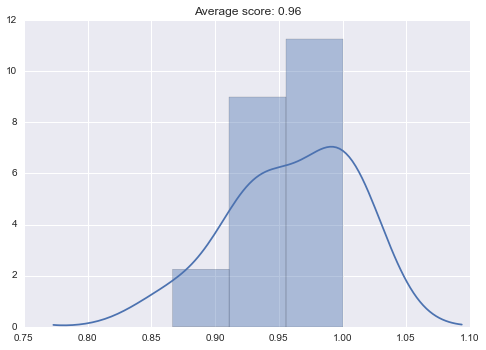

In [45]:
# performing 10-fold cross-validations
from sklearn.cross_validation import cross_val_score
dtc = DecisionTreeClassifier()

cv_scores = cross_val_score(dtc, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

## parameter tuning
* 모든 기계학습모델은 다양한 파라미터를 이용해서 튜닝을 하고, 이런 파라미터들은 분류기 성능에 있어서 굉장히 중요한 역학을 하게 된다.
* 결정 트리에서의 깊이를 제한해보자

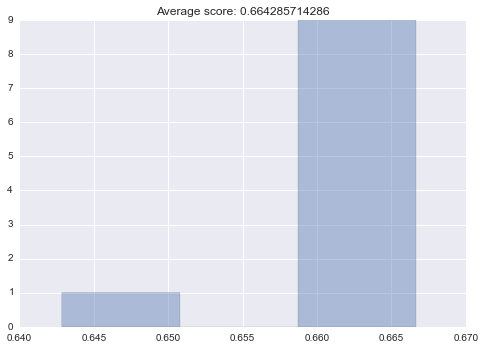

In [47]:
dtc = DecisionTreeClassifier(max_depth=1)
cv_scores = cross_val_score(dtc, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

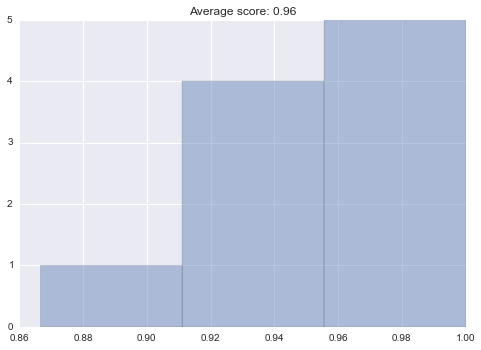

In [49]:
# depth=10
dtc = DecisionTreeClassifier(max_depth=10)
cv_scores = cross_val_score(dtc, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

* 그래서, 우리는 계획적으로 최고 품질을 위한 최상의 파라미터를 찾을 필요가 있다. 
* 이 과정을 보통 **Grid Search**라고 한다. 
 * 파라미터를 일정 범위에서 탐색하면서 최고-품질의 파라미터 조합을 찾아 내는 것이다.
 * 파라미터 탐색의 최적의 범위를 찾는데 집중해야하면, 그 다음엔 몇번 이런 절차를 반복해서, 최상의 파라미터를 찾아내는 것이다.
 * 해보자.


In [50]:
from sklearn.grid_search import GridSearchCV
dtc = DecisionTreeClassifier()
parameter_grid = {'max_depth' : [1,2,3,4,5],
                  'max_features' : [1,2,3,4]}
cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(dtc, 
                           param_grid = parameter_grid, 
                           cv = cross_validation)

grid_search.fit(all_inputs, all_classes)
print 'best scores: {}'.format(grid_search.best_score_)
print 'best parameters: {}'.format(grid_search.best_params_)

best scores: 0.959731543624
best parameters: {'max_features': 3, 'max_depth': 3}


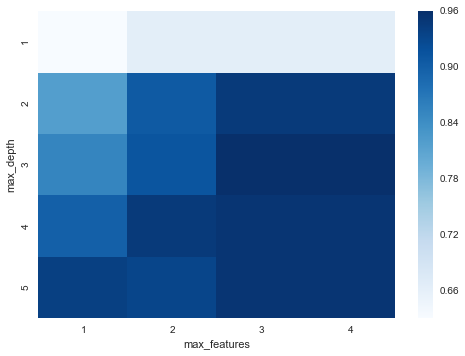

In [51]:
# Visualization
grid_visualization = []
for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)

grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5,4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4)+0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5)+0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [52]:
dtc = DecisionTreeClassifier()
parameter_grid = {'criterion' : ['gini', 'entropy'],
                  'splitter': ['best','random'],
                  'max_depth' : [1,2,3,4,5],
                  'max_features' : [1,2,3,4]}
cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(dtc, 
                           param_grid = parameter_grid, 
                           cv = cross_validation)

grid_search.fit(all_inputs, all_classes)
print 'best scores: {}'.format(grid_search.best_score_)
print 'best parameters: {}'.format(grid_search.best_params_)

best scores: 0.973154362416
best parameters: {'max_features': 2, 'splitter': 'best', 'criterion': 'gini', 'max_depth': 4}


In [53]:
# taking best classifier using grid_search
dtc = grid_search.best_estimator_
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [54]:
# visualization Decision Tree using GraphViz
import sklearn.tree as tree
from sklearn.externals.six import StringIO
with open('iris_dtc.dot','w') as out_file:
    out_file = tree.export_graphviz(dtc, out_file=out_file)

In [59]:
!dot -Tpng iris_dtc.dot -o iris_dtc.png

In [60]:
from IPython.display import Image

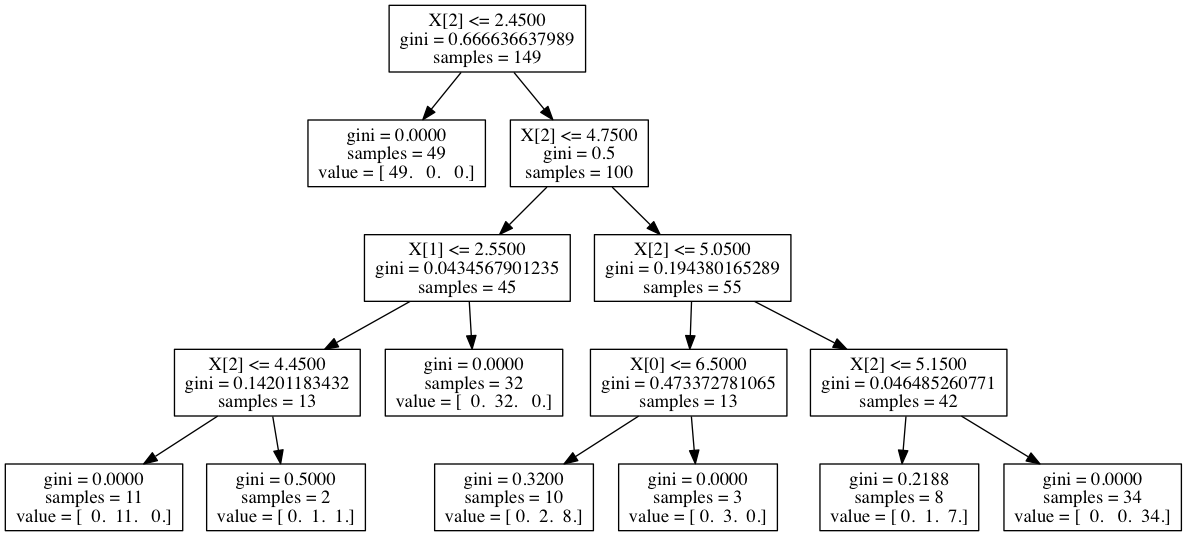

In [62]:
Image(filename='iris_dtc.png')

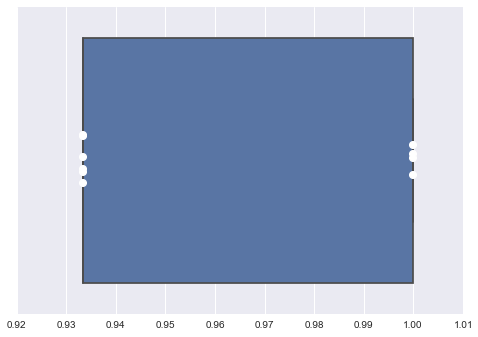

In [64]:
rf_scores = cross_val_score(dtc, all_inputs, all_classes, cv=10)

sb.boxplot(rf_scores)
sb.stripplot(rf_scores, jitter=True, color='white')

## random forest
* Let that be a lesson to you: Even in Machine Learning, you get better results when you work together!

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(rfc,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.973154362416
Best parameters: {'max_features': 2, 'n_estimators': 5, 'criterion': 'entropy', 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

In [71]:
rfc = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy' : cross_val_score(rfc, all_inputs, all_classes, cv=10),
                      'classifier':['Random Forest']*10})
dt_df = pd.DataFrame({'accuracy' : cross_val_score(dtc, all_inputs, all_classes, cv=10),
                      'classifier':['Decison Tree']*10})   
both_df = rf_df.append(dt_df)

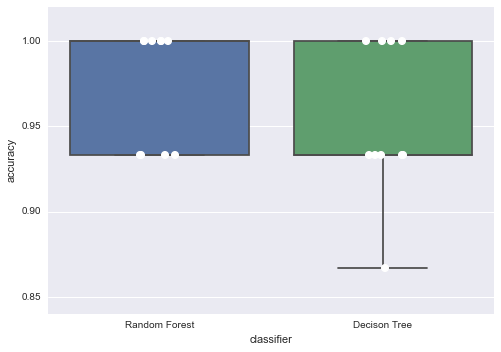

In [72]:
sb.boxplot(x='classifier',y='accuracy', data=both_df)
sb.stripplot(x='classifier',y='accuracy', data=both_df, jitter=True, color='white')

# step 6, Reproducibility

In [74]:
%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py

Installed watermark.py. To use it, type:
  %load_ext watermark


In [75]:
%load_ext watermark

In [77]:
%watermark -a 'Byeong-il Ko' -nmv --packages numpy,pandas,scikit-learn,matplotlib,Seaborn

Byeong-il Ko Tue Aug 25 2015 

CPython 2.7.10
IPython 3.2.1

numpy 1.9.2
pandas 0.16.2
scikit-learn 0.16.1
matplotlib 1.4.3
Seaborn 0.6.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)
system     : Darwin
release    : 14.5.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


[ 6.1  2.6  5.6  1.4]	-->	Iris-versicolor	(Actual: Iris-virginica)
[ 4.6  3.1  1.5  0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 5.8  2.7  3.9  1.2]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.   3.   1.6  0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 6.   2.2  4.   1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.2  3.5  1.5  0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 4.9  2.5  4.5  1.7]	-->	Iris-versicolor	(Actual: Iris-virginica)
[ 5.   2.3  3.3  1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.7  2.9  4.2  1.3]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.5  2.4  3.8  1.1]	-->	Iris-versicolor	(Actual: Iris-versicolor)


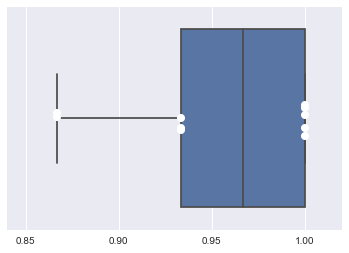

In [78]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='white')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))
 